In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr, spearmanr
from sklearn.metrics import jaccard_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import networkx as nx
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎìú ÏôÑÎ£å")

# ÌïúÍ∏Ä Ìè∞Ìä∏ Íπ®Ïßê Î∞©ÏßÄ ÏÑ§Ï†ï (ÏúàÎèÑÏö∞/Îß•/Î¶¨ÎàÖÏä§ ÌôòÍ≤ΩÎ≥Ñ)
import platform
from matplotlib import font_manager, rc

system_name = platform.system()
if system_name == 'Windows':
    font_path = "C:/Windows/Fonts/malgun.ttf"
    rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':  # MacOS
    font_path = "/System/Library/Fonts/AppleGothic.ttf"
    rc('font', family='AppleGothic')
else:  # Linux
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

print("ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å")


ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎìú ÏôÑÎ£å
ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å


In [2]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv(r'C:\Users\young\Downloads\w38_user_action6.csv')
df.set_index('USER_SEQ', inplace=True)

# lotto_total, lotto_nonad Ïª¨Îüº Ï†úÍ±∞

print("=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df.shape}")
print(f"Ïª¨ÎüºÎ™Ö: {list(df.columns)}")
print("\n=== Í∏∞Î≥∏ ÌÜµÍ≥Ñ ===")
print(df.describe())


=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (59778, 12)
Ïª¨ÎüºÎ™Ö: ['LIKE_DAYS', 'CARD_DAYS', 'QUIZ_DAYS', 'FOLLOW_DAYS', 'COUPANG_DAYS', 'STRETCHING_DAYS', 'BUZZVILL_DAYS', 'WALK_DAYS', 'RAFFLE_DAYS', 'CHG_DAYS', 'LOTT_TOTAL', 'LOTT_AD']

=== Í∏∞Î≥∏ ÌÜµÍ≥Ñ ===
          LIKE_DAYS     CARD_DAYS     QUIZ_DAYS   FOLLOW_DAYS  COUPANG_DAYS  \
count  59778.000000  59778.000000  59778.000000  59778.000000  59778.000000   
mean       0.004517      0.445565      1.042323      0.000970      0.470390   
std        0.099917      1.511616      2.519027      0.044041      1.744912   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000     12.000000     12.000000      6.000000     12.000000   

       STRETCHING_DA

In [3]:
df.reset_index().USER_SEQ.count()

59778

In [4]:
# 1Îã®Í≥Ñ: Í∏∞Î≥∏ Ïó∞Í¥ÄÏÑ± ÌååÏïÖ
print("=== 1Îã®Í≥Ñ: Í∏∞Î≥∏ Ïó∞Í¥ÄÏÑ± ÌååÏïÖ ===")

# ÏΩòÌÖêÏ∏† Ïª¨Îüº Ï†ïÏùò
content_columns = ['LIKE_DAYS', 'CARD_DAYS', 'QUIZ_DAYS', 'FOLLOW_DAYS', 'COUPANG_DAYS', 
                  'STRETCHING_DAYS', 'BUZZVILL_DAYS', 'WALK_DAYS', 'RAFFLE_DAYS', 
                  'CHG_DAYS',  'LOTT_AD', 'LOTT_TOTAL']

# 1-1. Í∞Å ÏΩòÌÖêÏ∏†Î≥Ñ Ï∞∏Ïó¨Ïûê Ïàò Î∞è ÎπÑÏú®
print("\n1-1. Í∞Å ÏΩòÌÖêÏ∏†Î≥Ñ Ï∞∏Ïó¨Ïûê Ïàò Î∞è ÎπÑÏú®:")
participation_stats = []
for col in content_columns:
    if col in df.columns:
        participants = (df[col] > 0).sum()
        total_users = len(df)
        participation_rate = (participants / total_users) * 100
        participation_stats.append({
            'content': col,
            'participants': participants,
            'participation_rate': participation_rate
        })
        print(f"  {col}: {participants:,}Î™Ö ({participation_rate:.1f}%)")

participation_df = pd.DataFrame(participation_stats)


=== 1Îã®Í≥Ñ: Í∏∞Î≥∏ Ïó∞Í¥ÄÏÑ± ÌååÏïÖ ===

1-1. Í∞Å ÏΩòÌÖêÏ∏†Î≥Ñ Ï∞∏Ïó¨Ïûê Ïàò Î∞è ÎπÑÏú®:
  LIKE_DAYS: 193Î™Ö (0.3%)
  CARD_DAYS: 9,762Î™Ö (16.3%)
  QUIZ_DAYS: 14,600Î™Ö (24.4%)
  FOLLOW_DAYS: 45Î™Ö (0.1%)
  COUPANG_DAYS: 7,657Î™Ö (12.8%)
  STRETCHING_DAYS: 3,092Î™Ö (5.2%)
  BUZZVILL_DAYS: 924Î™Ö (1.5%)
  WALK_DAYS: 28,401Î™Ö (47.5%)
  RAFFLE_DAYS: 38,268Î™Ö (64.0%)
  CHG_DAYS: 15,849Î™Ö (26.5%)
  LOTT_AD: 8,861Î™Ö (14.8%)
  LOTT_TOTAL: 31,650Î™Ö (52.9%)


In [5]:
# 1-2. ÍµêÏ∞®Î∂ÑÏÑù: Í∞Å ÏΩòÌÖêÏ∏† ÏåçÎ≥Ñ Ï∞∏Ïó¨Ïûê Í≤πÏπ® Î∂ÑÏÑù
print("\n1-2. ÍµêÏ∞®Î∂ÑÏÑù: ÏΩòÌÖêÏ∏† ÏåçÎ≥Ñ Ï∞∏Ïó¨Ïûê Í≤πÏπ® Î∂ÑÏÑù")

# Í≤πÏπ® Î∂ÑÏÑùÏùÑ ÏúÑÌïú Ìï®Ïàò
def analyze_content_overlap(df, content_columns):
    overlap_results = []
    
    for i, col1 in enumerate(content_columns):
        if col1 not in df.columns:
            continue
        for j, col2 in enumerate(content_columns):
            if col2 not in df.columns or i >= j:
                continue
                
            # Ï∞∏Ïó¨Ïûê ÏßëÌï©
            users1 = set(df[df[col1] > 0].index)
            users2 = set(df[df[col2] > 0].index)
            
            # Í≤πÏπ® Í≥ÑÏÇ∞
            intersection = len(users1 & users2)
            union = len(users1 | users2)
            jaccard = intersection / union if union > 0 else 0
            
            # Ï°∞Í±¥Î∂Ä ÌôïÎ•†
            prob_b_given_a = intersection / len(users1) if len(users1) > 0 else 0
            prob_a_given_b = intersection / len(users2) if len(users2) > 0 else 0
            
            overlap_results.append({
                'content1': col1,
                'content2': col2,
                'intersection': intersection,
                'union': union,
                'jaccard_similarity': jaccard,
                'prob_b_given_a': prob_b_given_a,
                'prob_a_given_b': prob_a_given_b
            })
    
    return pd.DataFrame(overlap_results)

overlap_df = analyze_content_overlap(df, content_columns)

# ÏÉÅÏúÑ Í≤πÏπ® Í≤∞Í≥º Ï∂úÎ†•
print("\nÏÉÅÏúÑ 10Í∞ú ÏΩòÌÖêÏ∏† Ïåç (Jaccard Ïú†ÏÇ¨ÎèÑ Í∏∞Ï§Ä):")
top_overlaps = overlap_df.nlargest(20, 'jaccard_similarity')
for _, row in top_overlaps.iterrows():
    print(f"  {row['content1']} ‚Üî {row['content2']}: {row['jaccard_similarity']:.3f} (Í≤πÏπ®: {row['intersection']:,}Î™Ö)")

print(f"\nÏ¥ù {len(overlap_df)}Í∞úÏùò ÏΩòÌÖêÏ∏† Ïåç Î∂ÑÏÑù ÏôÑÎ£å")



1-2. ÍµêÏ∞®Î∂ÑÏÑù: ÏΩòÌÖêÏ∏† ÏåçÎ≥Ñ Ï∞∏Ïó¨Ïûê Í≤πÏπ® Î∂ÑÏÑù

ÏÉÅÏúÑ 10Í∞ú ÏΩòÌÖêÏ∏† Ïåç (Jaccard Ïú†ÏÇ¨ÎèÑ Í∏∞Ï§Ä):
  CARD_DAYS ‚Üî QUIZ_DAYS: 0.590 (Í≤πÏπ®: 9,044Î™Ö)
  WALK_DAYS ‚Üî RAFFLE_DAYS: 0.459 (Í≤πÏπ®: 20,989Î™Ö)
  WALK_DAYS ‚Üî CHG_DAYS: 0.439 (Í≤πÏπ®: 13,510Î™Ö)
  QUIZ_DAYS ‚Üî WALK_DAYS: 0.424 (Í≤πÏπ®: 12,800Î™Ö)
  WALK_DAYS ‚Üî LOTT_TOTAL: 0.392 (Í≤πÏπ®: 16,903Î™Ö)
  CARD_DAYS ‚Üî COUPANG_DAYS: 0.378 (Í≤πÏπ®: 4,776Î™Ö)
  QUIZ_DAYS ‚Üî COUPANG_DAYS: 0.373 (Í≤πÏπ®: 6,049Î™Ö)
  QUIZ_DAYS ‚Üî CHG_DAYS: 0.329 (Í≤πÏπ®: 7,540Î™Ö)
  CHG_DAYS ‚Üî LOTT_TOTAL: 0.305 (Í≤πÏπ®: 11,108Î™Ö)
  RAFFLE_DAYS ‚Üî LOTT_TOTAL: 0.305 (Í≤πÏπ®: 16,337Î™Ö)
  COUPANG_DAYS ‚Üî STRETCHING_DAYS: 0.304 (Í≤πÏπ®: 2,505Î™Ö)
  CARD_DAYS ‚Üî WALK_DAYS: 0.296 (Í≤πÏπ®: 8,722Î™Ö)
  QUIZ_DAYS ‚Üî LOTT_TOTAL: 0.294 (Í≤πÏπ®: 10,518Î™Ö)
  QUIZ_DAYS ‚Üî LOTT_AD: 0.289 (Í≤πÏπ®: 5,258Î™Ö)
  QUIZ_DAYS ‚Üî RAFFLE_DAYS: 0.288 (Í≤πÏπ®: 11,819Î™Ö)
  CARD_DAYS ‚Üî LOTT_AD: 0.282 (Í≤πÏπ®: 4,091Î™Ö)
  LOTT_AD ‚Üî LOTT_TOTAL:

In [6]:
df.LOTT_AD.value_counts()

LOTT_AD
0     50917
1      3239
2      1034
10      812
9       698
3       599
8       491
4       478
7       460
5       447
6       440
11      163
Name: count, dtype: int64


1-3. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù


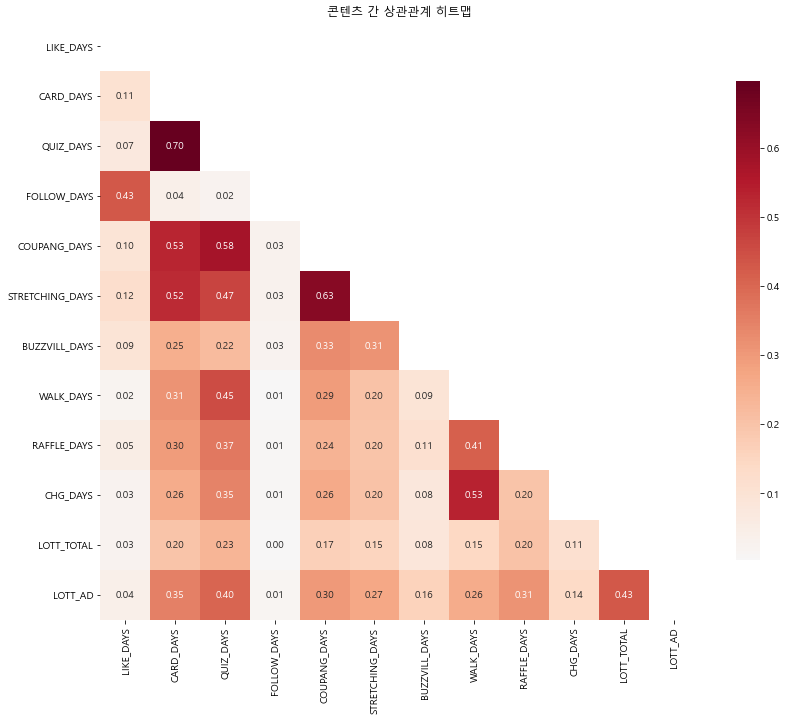


ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Îäî ÏΩòÌÖêÏ∏† Ïåç (|r| > 0.3):
  CARD_DAYS ‚Üî QUIZ_DAYS: 0.696
  COUPANG_DAYS ‚Üî STRETCHING_DAYS: 0.633
  QUIZ_DAYS ‚Üî COUPANG_DAYS: 0.577
  WALK_DAYS ‚Üî CHG_DAYS: 0.532
  CARD_DAYS ‚Üî COUPANG_DAYS: 0.526
  CARD_DAYS ‚Üî STRETCHING_DAYS: 0.518
  QUIZ_DAYS ‚Üî STRETCHING_DAYS: 0.469
  QUIZ_DAYS ‚Üî WALK_DAYS: 0.453
  LOTT_TOTAL ‚Üî LOTT_AD: 0.432
  LIKE_DAYS ‚Üî FOLLOW_DAYS: 0.429
  WALK_DAYS ‚Üî RAFFLE_DAYS: 0.414
  QUIZ_DAYS ‚Üî LOTT_AD: 0.403
  QUIZ_DAYS ‚Üî RAFFLE_DAYS: 0.368
  CARD_DAYS ‚Üî LOTT_AD: 0.350
  QUIZ_DAYS ‚Üî CHG_DAYS: 0.345
  COUPANG_DAYS ‚Üî BUZZVILL_DAYS: 0.329
  STRETCHING_DAYS ‚Üî BUZZVILL_DAYS: 0.314
  CARD_DAYS ‚Üî WALK_DAYS: 0.314
  RAFFLE_DAYS ‚Üî LOTT_AD: 0.313
  COUPANG_DAYS ‚Üî LOTT_AD: 0.301

Ï¥ù 20Í∞úÏùò ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç Î∞úÍ≤¨


In [7]:
# 1-3. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
print("\n1-3. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù")

# Ïà´ÏûêÌòï Ïª¨ÎüºÎßå ÏÑ†ÌÉù
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('ÏΩòÌÖêÏ∏† Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ')
plt.tight_layout()
plt.show()

# ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç Ï∞æÍ∏∞
print("\nÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Îäî ÏΩòÌÖêÏ∏† Ïåç (|r| > 0.3):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            high_corr_pairs.append({
                'content1': correlation_matrix.columns[i],
                'content2': correlation_matrix.columns[j],
                'correlation': corr_val
            })

high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('correlation', key=abs, ascending=False)
for _, row in high_corr_df.iterrows():
    print(f"  {row['content1']} ‚Üî {row['content2']}: {row['correlation']:.3f}")

print(f"\nÏ¥ù {len(high_corr_pairs)}Í∞úÏùò ÎÜíÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ïåç Î∞úÍ≤¨")



1-4. Í≥µÍ∏∞Ï∂úÌòÑ Î∂ÑÏÑù


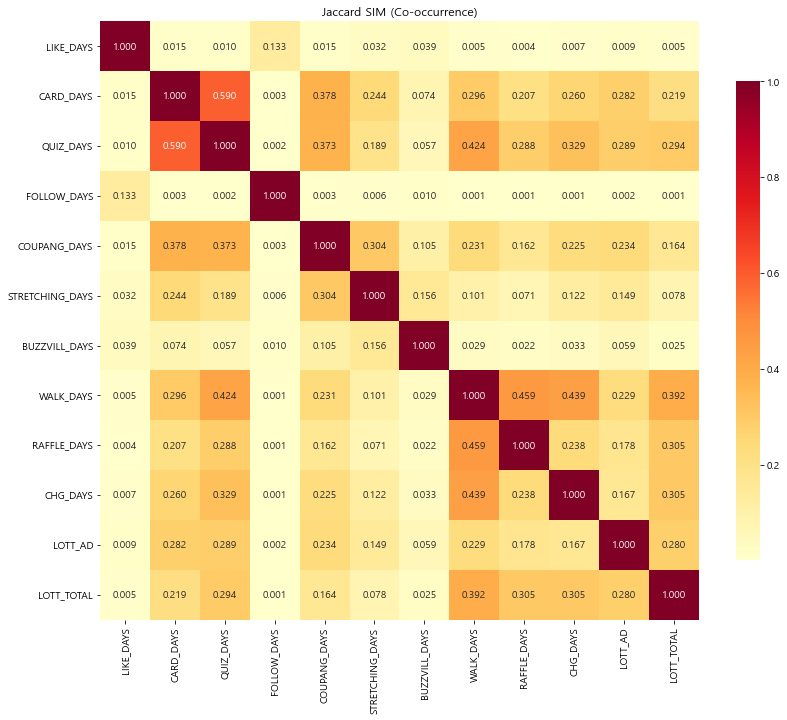

Jaccard sim


In [8]:
# 1-4. Í≥µÍ∏∞Ï∂úÌòÑ Î∂ÑÏÑù (Co-occurrence Analysis)
print("\n1-4. Í≥µÍ∏∞Ï∂úÌòÑ Î∂ÑÏÑù")

# Jaccard Ïú†ÏÇ¨ÎèÑ Îß§Ìä∏Î¶≠Ïä§ ÏÉùÏÑ±
def create_jaccard_matrix(df, content_columns):
    jaccard_matrix = pd.DataFrame(index=content_columns, columns=content_columns)
    
    for col1 in content_columns:
        if col1 not in df.columns:
            continue
        for col2 in content_columns:
            if col2 not in df.columns:
                continue
                
            if col1 == col2:
                jaccard_matrix.loc[col1, col2] = 1.0
            else:
                # Ïù¥ÏßÑ Î≥ÄÌôò (Ï∞∏Ïó¨/ÎπÑÏ∞∏Ïó¨)
                binary1 = (df[col1] > 0).astype(int)
                binary2 = (df[col2] > 0).astype(int)
                
                # Jaccard Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
                jaccard = jaccard_score(binary1, binary2, average='binary')
                jaccard_matrix.loc[col1, col2] = jaccard
    
    return jaccard_matrix.astype(float)

jaccard_matrix = create_jaccard_matrix(df, content_columns)

# Jaccard Ïú†ÏÇ¨ÎèÑ ÌûàÌä∏Îßµ
plt.figure(figsize=(12, 10))
sns.heatmap(jaccard_matrix, annot=True, cmap='YlOrRd', fmt='.3f', 
            square=True, cbar_kws={"shrink": .8})
plt.title('Jaccard SIM (Co-occurrence)')
plt.tight_layout()
plt.show()

print("Jaccard sim")


In [9]:
df.index.size

59778

In [25]:
# 2Îã®Í≥Ñ: Ìå®ÌÑ¥ Î∞úÍ≤¨
print("\n=== 2Îã®Í≥Ñ: Ìå®ÌÑ¥ Î∞úÍ≤¨ ===")

# 2-1. Ïó∞Í¥ÄÍ∑úÏπô Î∂ÑÏÑù (Association Rule Mining)
print("\n2-1. Ïó∞Í¥ÄÍ∑úÏπô Î∂ÑÏÑù")

def find_association_rules(df, content_columns, min_support=0.01, min_confidence=0.1):
    """Í∞ÑÎã®Ìïú Ïó∞Í¥ÄÍ∑úÏπô Î∂ÑÏÑù"""
    rules = []
    
    for col1 in content_columns:
        if col1 not in df.columns:
            continue
        for col2 in content_columns:
            if col2 not in df.columns or col1 == col2:
                continue
                
            # Ïù¥ÏßÑ Î≥ÄÌôò
            binary1 = (df[col1] > 0).astype(int)
            binary2 = (df[col2] > 0).astype(int)
            
            # ÏßÄÏßÄÎèÑ, Ïã†Î¢∞ÎèÑ, Ìñ•ÏÉÅÎèÑ Í≥ÑÏÇ∞
            support_ab = ((binary1 == 1) & (binary2 == 1)).sum() / len(df)
            support_a = (binary1 == 1).sum() / len(df)
            support_b = (binary2 == 1).sum() / len(df)
            
            if support_a > 0:
                confidence = support_ab / support_a
                lift = confidence / support_b if support_b > 0 else 0
                
                if support_ab >= min_support and confidence >= min_confidence:
                    rules.append({
                        'antecedent': col1,
                        'consequent': col2,
                        'support': support_ab,
                        'confidence': confidence,
                        'lift': lift
                    })
    
    return pd.DataFrame(rules).sort_values('lift', ascending=False)

# Ïó∞Í¥ÄÍ∑úÏπô Ï∞æÍ∏∞
rules_df = find_association_rules(df, content_columns, min_support=0.005, min_confidence=0.1)

print(f"Î∞úÍ≤¨Îêú Ïó∞Í¥ÄÍ∑úÏπô Ïàò: {len(rules_df)}Í∞ú")
if len(rules_df) > 0:
    print("\nÏÉÅÏúÑ 10Í∞ú Ïó∞Í¥ÄÍ∑úÏπô (Ìñ•ÏÉÅÎèÑ Í∏∞Ï§Ä):")
    for i, (_, rule) in enumerate(rules_df.head(100).iterrows()):
        print(f"  {i+1}. {rule['antecedent']} ‚Üí {rule['consequent']}")
        print(f"     ÏßÄÏßÄÎèÑ: {rule['support']:.3f}, Ïã†Î¢∞ÎèÑ: {rule['confidence']:.3f}, Ìñ•ÏÉÅÎèÑ: {rule['lift']:.3f}")
else:
    print("Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Ïó∞Í¥ÄÍ∑úÏπôÏù¥ ÏóÜÏäµÎãàÎã§. Í∏∞Ï§ÄÏùÑ ÎÇÆÏ∂∞Î≥¥Í≤†ÏäµÎãàÎã§.")
    rules_df = find_association_rules(df, content_columns, min_support=0.05, min_confidence=0.05)
    print(f"ÎÇÆÏùÄ Í∏∞Ï§ÄÏúºÎ°ú Î∞úÍ≤¨Îêú Ïó∞Í¥ÄÍ∑úÏπô Ïàò: {len(rules_df)}Í∞ú")



=== 2Îã®Í≥Ñ: Ìå®ÌÑ¥ Î∞úÍ≤¨ ===

2-1. Ïó∞Í¥ÄÍ∑úÏπô Î∂ÑÏÑù
Î∞úÍ≤¨Îêú Ïó∞Í¥ÄÍ∑úÏπô Ïàò: 64Í∞ú

ÏÉÅÏúÑ 10Í∞ú Ïó∞Í¥ÄÍ∑úÏπô (Ìñ•ÏÉÅÎèÑ Í∏∞Ï§Ä):
  1. COUPANG_DAYS ‚Üí STRETCHING_DAYS
     ÏßÄÏßÄÎèÑ: 0.012, Ïã†Î¢∞ÎèÑ: 0.327, Ìñ•ÏÉÅÎèÑ: 21.675
  2. STRETCHING_DAYS ‚Üí COUPANG_DAYS
     ÏßÄÏßÄÎèÑ: 0.012, Ïã†Î¢∞ÎèÑ: 0.810, Ìñ•ÏÉÅÎèÑ: 21.675
  3. CARD_DAYS ‚Üí STRETCHING_DAYS
     ÏßÄÏßÄÎèÑ: 0.012, Ïã†Î¢∞ÎèÑ: 0.258, Ìñ•ÏÉÅÎèÑ: 17.117
  4. STRETCHING_DAYS ‚Üí CARD_DAYS
     ÏßÄÏßÄÎèÑ: 0.012, Ïã†Î¢∞ÎèÑ: 0.816, Ìñ•ÏÉÅÎèÑ: 17.117
  5. COUPANG_DAYS ‚Üí CARD_DAYS
     ÏßÄÏßÄÎèÑ: 0.023, Ïã†Î¢∞ÎèÑ: 0.624, Ìñ•ÏÉÅÎèÑ: 13.089
  6. CARD_DAYS ‚Üí COUPANG_DAYS
     ÏßÄÏßÄÎèÑ: 0.023, Ïã†Î¢∞ÎèÑ: 0.489, Ìñ•ÏÉÅÎèÑ: 13.089
  7. CARD_DAYS ‚Üí QUIZ_DAYS
     ÏßÄÏßÄÎèÑ: 0.044, Ïã†Î¢∞ÎèÑ: 0.926, Ìñ•ÏÉÅÎèÑ: 12.999
  8. QUIZ_DAYS ‚Üí CARD_DAYS
     ÏßÄÏßÄÎèÑ: 0.044, Ïã†Î¢∞ÎèÑ: 0.619, Ìñ•ÏÉÅÎèÑ: 12.999
  9. QUIZ_DAYS ‚Üí STRETCHING_DAYS
     ÏßÄÏßÄÎèÑ: 0.014, Ïã†Î¢∞ÎèÑ: 0.193, Ìñ•ÏÉÅÎèÑ: 12.788
  10. STRETCHING_DAYS ‚Üí Q


2-2. ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÏÑù
ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (59778, 12)


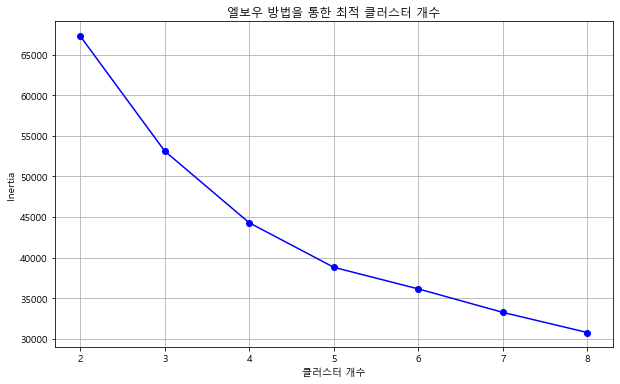


4Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞Î°ú Î∂ÑÏÑù:
K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌÅ¨Í∏∞: [18051 16506 14307 10914]
Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä Ïª§ÏÑú ÏÉùÎûµÌïòÏòÄÏäµÎãàÎã§.


In [11]:
# 2-2. ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÏÑù (Cluster Analysis)
print("\n2-2. ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÏÑù")

# ÏÇ¨Ïö©ÏûêÎ≥Ñ Ï∞∏Ïó¨ Ìå®ÌÑ¥ÏùÑ Ïù¥ÏßÑ Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
binary_data = pd.DataFrame()
for col in content_columns:
    if col in df.columns:
        binary_data[col] = (df[col] > 0).astype(int)

print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {binary_data.shape}")

# K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÎßå ÏàòÌñâ (Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÄ ÎåÄÏö©Îüâ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î©îÎ™®Î¶¨ Î¨∏Ï†úÎ°ú Ï†úÏô∏)
def perform_kmeans_clustering(data, n_clusters_range=(2, 8)):
    """Îã§ÏñëÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎ°ú K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÎßå ÏàòÌñâ"""
    results = {}
    
    for n_clusters in range(n_clusters_range[0], n_clusters_range[1] + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans_labels = kmeans.fit_predict(data)
        results[n_clusters] = {
            'kmeans': kmeans_labels,
            'kmeans_inertia': kmeans.inertia_
        }
    
    return results

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
clustering_results = perform_kmeans_clustering(binary_data)

# ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Ï∞æÍ∏∞ (ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï)
inertias = [clustering_results[k]['kmeans_inertia'] for k in clustering_results.keys()]
plt.figure(figsize=(10, 6))
plt.plot(list(clustering_results.keys()), inertias, 'bo-')
plt.xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò')
plt.ylabel('Inertia')
plt.title('ÏóòÎ≥¥Ïö∞ Î∞©Î≤ïÏùÑ ÌÜµÌïú ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò')
plt.grid(True)
plt.show()

# 4Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞Î°ú Î∂ÑÏÑù (ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ï†ÅÎãπÌïú Ïàò)
optimal_k = 4
kmeans_labels = clustering_results[optimal_k]['kmeans']

print(f"\n{optimal_k}Í∞ú ÌÅ¥Îü¨Ïä§ÌÑ∞Î°ú Î∂ÑÏÑù:")
print(f"K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌÅ¨Í∏∞: {np.bincount(kmeans_labels)}")
print("Í≥ÑÏ∏µÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä Ïª§ÏÑú ÏÉùÎûµÌïòÏòÄÏäµÎãàÎã§.")



2-3. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏΩòÌÖêÏ∏† ÏÑ†Ìò∏ÎèÑ Î∂ÑÏÑù
K-means ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏΩòÌÖêÏ∏† ÏÑ†Ìò∏ÎèÑ:

ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 (ÌÅ¨Í∏∞: 18,051Î™Ö, 30.2%)
  1. WALK_DAYS: 100.0%
  2. RAFFLE_DAYS: 65.1%
  3. LOTT_TOTAL: 46.7%
  4. CHG_DAYS: 40.4%
  5. QUIZ_DAYS: 15.2%
  6. LOTT_AD: 10.6%
  7. COUPANG_DAYS: 6.3%
  8. CARD_DAYS: 1.4%
  9. STRETCHING_DAYS: 0.9%
  10. BUZZVILL_DAYS: 0.2%
  11. LIKE_DAYS: 0.1%
  12. FOLLOW_DAYS: 0.0%

ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 (ÌÅ¨Í∏∞: 16,506Î™Ö, 27.6%)
  1. RAFFLE_DAYS: 89.0%
  2. CHG_DAYS: 6.9%
  3. QUIZ_DAYS: 4.3%
  4. COUPANG_DAYS: 2.3%
  5. CARD_DAYS: 2.1%
  6. STRETCHING_DAYS: 0.2%
  7. BUZZVILL_DAYS: 0.2%
  8. LIKE_DAYS: 0.1%
  9. FOLLOW_DAYS: 0.0%
  10. WALK_DAYS: 0.0%
  11. LOTT_AD: 0.0%
  12. LOTT_TOTAL: 0.0%

ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (ÌÅ¨Í∏∞: 14,307Î™Ö, 23.9%)
  1. LOTT_TOTAL: 100.0%
  2. RAFFLE_DAYS: 15.4%
  3. LOTT_AD: 11.9%
  4. CHG_DAYS: 7.1%
  5. QUIZ_DAYS: 3.8%
  6. CARD_DAYS: 1.3%
  7. COUPANG_DAYS: 1.3%
  8. STRETCHING_DAYS: 0.3%
  9. BUZZVILL_DAYS: 0.1%
  10. LIKE_DAYS: 0.1%
 

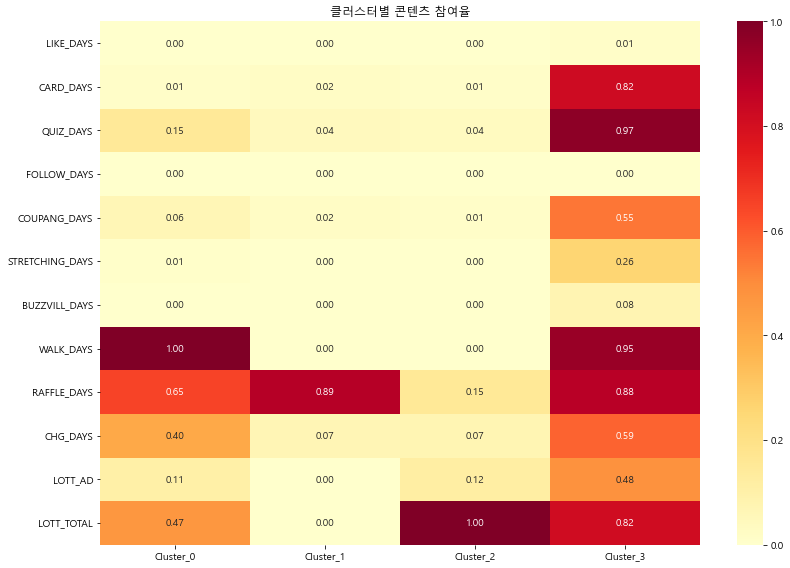

In [12]:
# 2-3. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏΩòÌÖêÏ∏† ÏÑ†Ìò∏ÎèÑ Î∂ÑÏÑù
print("\n2-3. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏΩòÌÖêÏ∏† ÏÑ†Ìò∏ÎèÑ Î∂ÑÏÑù")

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏΩòÌÖêÏ∏† Ï∞∏Ïó¨Ïú® Í≥ÑÏÇ∞
def analyze_cluster_preferences(binary_data, labels, content_columns):
    """ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏΩòÌÖêÏ∏† ÏÑ†Ìò∏ÎèÑ Î∂ÑÏÑù"""
    cluster_preferences = []
    
    for cluster_id in range(max(labels) + 1):
        cluster_mask = labels == cluster_id
        cluster_data = binary_data[cluster_mask]
        cluster_size = len(cluster_data)
        
        if cluster_size > 0:
            preferences = {}
            for col in content_columns:
                if col in binary_data.columns:
                    participation_rate = cluster_data[col].mean()
                    preferences[col] = participation_rate
            
            cluster_preferences.append({
                'cluster': cluster_id,
                'size': cluster_size,
                'size_ratio': cluster_size / len(binary_data),
                'preferences': preferences
            })
    
    return cluster_preferences

# K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∂ÑÏÑù
kmeans_preferences = analyze_cluster_preferences(binary_data, kmeans_labels, content_columns)

print("K-means ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏΩòÌÖêÏ∏† ÏÑ†Ìò∏ÎèÑ:")
for cluster_info in kmeans_preferences:
    print(f"\nÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_info['cluster']} (ÌÅ¨Í∏∞: {cluster_info['size']:,}Î™Ö, {cluster_info['size_ratio']*100:.1f}%)")
    
    # ÏÉÅÏúÑ 5Í∞ú ÏÑ†Ìò∏ ÏΩòÌÖêÏ∏†
    sorted_prefs = sorted(cluster_info['preferences'].items(), key=lambda x: x[1], reverse=True)
    for i, (content, rate) in enumerate(sorted_prefs[:]):
        print(f"  {i+1}. {content}: {rate*100:.1f}%")

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÑ†Ìò∏ÎèÑ ÌûàÌä∏Îßµ
cluster_pref_matrix = pd.DataFrame()
for cluster_info in kmeans_preferences:
    cluster_pref_matrix[f"Cluster_{cluster_info['cluster']}"] = pd.Series(cluster_info['preferences'])

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_pref_matrix, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏΩòÌÖêÏ∏† Ï∞∏Ïó¨Ïú®')
plt.tight_layout()
plt.show()



2-4. ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂ÑÏÑù
ÎÑ§Ìä∏ÏõåÌÅ¨ ÎÖ∏Îìú Ïàò: 12
ÎÑ§Ìä∏ÏõåÌÅ¨ Ïó£ÏßÄ Ïàò: 26


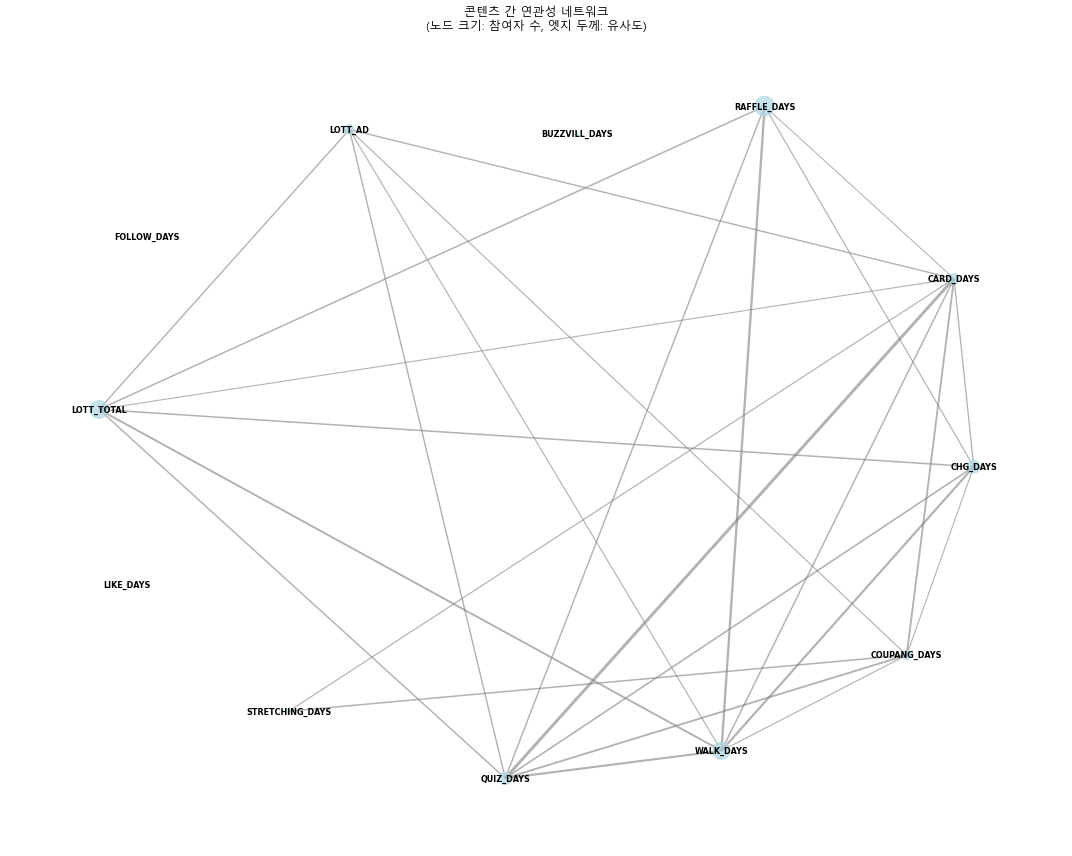


ÎÑ§Ìä∏ÏõåÌÅ¨ Ï§ëÏã¨ÏÑ± Î∂ÑÏÑù:

DEGREE Ï§ëÏã¨ÏÑ± (ÏÉÅÏúÑ 5Í∞ú):
  1. CARD_DAYS: 0.727
  2. QUIZ_DAYS: 0.636
  3. WALK_DAYS: 0.636
  4. COUPANG_DAYS: 0.545
  5. CHG_DAYS: 0.545

BETWEENNESS Ï§ëÏã¨ÏÑ± (ÏÉÅÏúÑ 5Í∞ú):
  1. CARD_DAYS: 0.089
  2. COUPANG_DAYS: 0.040
  3. QUIZ_DAYS: 0.016
  4. WALK_DAYS: 0.016
  5. LOTT_TOTAL: 0.008

CLOSENESS Ï§ëÏã¨ÏÑ± (ÏÉÅÏúÑ 5Í∞ú):
  1. CARD_DAYS: 0.727
  2. QUIZ_DAYS: 0.646
  3. WALK_DAYS: 0.646
  4. COUPANG_DAYS: 0.582
  5. CHG_DAYS: 0.582

EIGENVECTOR Ï§ëÏã¨ÏÑ± (ÏÉÅÏúÑ 5Í∞ú):
  1. CARD_DAYS: 0.405
  2. QUIZ_DAYS: 0.389
  3. WALK_DAYS: 0.389
  4. CHG_DAYS: 0.347
  5. LOTT_TOTAL: 0.345


In [13]:
# 2-4. ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂ÑÏÑù (Network Analysis)
print("\n2-4. ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂ÑÏÑù")

# ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
def create_content_network(jaccard_matrix, threshold=0.1):
    """ÏΩòÌÖêÏ∏† Í∞Ñ ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±"""
    G = nx.Graph()
    
    # ÎÖ∏Îìú Ï∂îÍ∞Ä
    for content in jaccard_matrix.index:
        G.add_node(content)
    
    # Ïó£ÏßÄ Ï∂îÍ∞Ä (ÏûÑÍ≥ÑÍ∞í Ïù¥ÏÉÅÏùò Ïú†ÏÇ¨ÎèÑ)
    for i, content1 in enumerate(jaccard_matrix.index):
        for j, content2 in enumerate(jaccard_matrix.columns):
            if i < j:  # Ï§ëÎ≥µ Î∞©ÏßÄ
                similarity = jaccard_matrix.loc[content1, content2]
                if similarity >= threshold:
                    G.add_edge(content1, content2, weight=similarity)
    
    return G

# ÎÑ§Ìä∏ÏõåÌÅ¨ ÏÉùÏÑ±
network = create_content_network(jaccard_matrix, threshold=0.2)

print(f"ÎÑ§Ìä∏ÏõåÌÅ¨ ÎÖ∏Îìú Ïàò: {network.number_of_nodes()}")
print(f"ÎÑ§Ìä∏ÏõåÌÅ¨ Ïó£ÏßÄ Ïàò: {network.number_of_edges()}")

# ÎÑ§Ìä∏ÏõåÌÅ¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(network, k=3, iterations=50)

# ÎÖ∏Îìú ÌÅ¨Í∏∞ (Ï∞∏Ïó¨Ïûê ÏàòÏóê ÎπÑÎ°Ä)
node_sizes = []
for node in network.nodes():
    if node in participation_df['content'].values:
        size = participation_df[participation_df['content'] == node]['participants'].iloc[0]
        node_sizes.append(size / 100)  # ÌÅ¨Í∏∞ Ï°∞Ï†ï
    else:
        node_sizes.append(100)

# Ïó£ÏßÄ ÎëêÍªò (Ïú†ÏÇ¨ÎèÑÏóê ÎπÑÎ°Ä)
edge_weights = [network[u][v]['weight'] * 5 for u, v in network.edges()]

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
nx.draw_networkx_nodes(network, pos, node_size=node_sizes, 
                      node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(network, pos, width=edge_weights, 
                      edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(network, pos, font_size=8, font_weight='bold')

plt.title('ÏΩòÌÖêÏ∏† Í∞Ñ Ïó∞Í¥ÄÏÑ± ÎÑ§Ìä∏ÏõåÌÅ¨\n(ÎÖ∏Îìú ÌÅ¨Í∏∞: Ï∞∏Ïó¨Ïûê Ïàò, Ïó£ÏßÄ ÎëêÍªò: Ïú†ÏÇ¨ÎèÑ)')
plt.axis('off')
plt.tight_layout()
plt.show()

# ÎÑ§Ìä∏ÏõåÌÅ¨ Ï§ëÏã¨ÏÑ± Î∂ÑÏÑù
print("\nÎÑ§Ìä∏ÏõåÌÅ¨ Ï§ëÏã¨ÏÑ± Î∂ÑÏÑù:")
centrality_measures = {
    'degree': nx.degree_centrality(network),
    'betweenness': nx.betweenness_centrality(network),
    'closeness': nx.closeness_centrality(network),
    'eigenvector': nx.eigenvector_centrality(network, max_iter=1000)
}

for measure_name, measures in centrality_measures.items():
    print(f"\n{measure_name.upper()} Ï§ëÏã¨ÏÑ± (ÏÉÅÏúÑ 5Í∞ú):")
    sorted_centrality = sorted(measures.items(), key=lambda x: x[1], reverse=True)
    for i, (content, centrality) in enumerate(sorted_centrality[:5]):
        print(f"  {i+1}. {content}: {centrality:.3f}")


In [14]:
# Í≥ÑÏ∏µÏ†Å Íµ∞Ïßë(Í≥ÑÏ∏µ Î™®Îç∏)ÏùÄ Ï†úÏô∏ÌïòÍ≥† KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï†ïÎ≥¥Îßå ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
print("=== KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï†ïÎ≥¥Î•º ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä (Í≥ÑÏ∏µ Î™®Îç∏ Ï†úÏô∏) ===")

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïó¥Îßå Ï∂îÍ∞Ä
df_with_clusters = df.reset_index().copy()
df_with_clusters['KMEANS_CLUSTER'] = kmeans_labels
# Í≥ÑÏ∏µÏ†Å Íµ∞Ïßë(hierarchical_labels)ÏùÄ ÏôÑÏ†ÑÌûà Ï†úÏô∏Ìï®

print(f"Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞: {df_with_clusters.shape}")
print(f"KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïó¥ Ï∂îÍ∞Ä ÏôÑÎ£å (Í≥ÑÏ∏µ Î™®Îç∏ Ï†úÏô∏)")

# KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∏∞Î≥∏ ÌÜµÍ≥Ñ ÌôïÏù∏ (Í≥ÑÏ∏µ Î™®Îç∏ ÌÜµÍ≥Ñ ÏóÜÏùå)
print("\n=== KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∏∞Î≥∏ ÌÜµÍ≥Ñ (Í≥ÑÏ∏µ Î™®Îç∏ Ï†úÏô∏) ===")
cluster_stats = df_with_clusters.groupby('KMEANS_CLUSTER').agg({
    'USER_SEQ': 'count',
    'QUIZ_DAYS': ['mean', 'std', 'min', 'max'],
    'WALK_DAYS': ['mean', 'std', 'min', 'max'],
    'CARD_DAYS': ['mean', 'std', 'min', 'max']
}).round(2)

print(cluster_stats)


=== KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï†ïÎ≥¥Î•º ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä (Í≥ÑÏ∏µ Î™®Îç∏ Ï†úÏô∏) ===
Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞: (59778, 14)
KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïó¥ Ï∂îÍ∞Ä ÏôÑÎ£å (Í≥ÑÏ∏µ Î™®Îç∏ Ï†úÏô∏)

=== KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∏∞Î≥∏ ÌÜµÍ≥Ñ (Í≥ÑÏ∏µ Î™®Îç∏ Ï†úÏô∏) ===
               USER_SEQ QUIZ_DAYS               WALK_DAYS                \
                  count      mean   std min max      mean   std min max   
KMEANS_CLUSTER                                                            
0                 18051      0.42  1.45   0  12      7.99  3.51   1  12   
1                 16506      0.05  0.27   0  10      0.00  0.00   0   0   
2                 14307      0.06  0.44   0  11      0.00  0.00   0   0   
3                 10914      4.87  3.59   0  12      8.35  3.50   0  12   

               CARD_DAYS                
                    mean   std min max  
KMEANS_CLUSTER                          
0                   0.01  0.14   0  10  
1                   0.02  0.16   0   6  
2  

In [15]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù ===")

# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ïã§Ï†ú Ï∞∏Ïó¨Ïùº Ïàò Î∂ÑÌè¨ ÌôïÏù∏
for cluster_id in range(4):
    cluster_data = df_with_clusters[df_with_clusters['KMEANS_CLUSTER'] == cluster_id]
    print(f"\n--- ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id} ({len(cluster_data):,}Î™Ö) ---")
    
    # Ï£ºÏöî ÏΩòÌÖêÏ∏†Î≥Ñ Ï∞∏Ïó¨Ïùº Ïàò ÌÜµÍ≥Ñ
    key_contents = ['QUIZ_DAYS', 'WALK_DAYS', 'CARD_DAYS', 'CHG_DAYS', 'RAFFLE_DAYS']
    for content in key_contents:
        if content in cluster_data.columns:
            stats = cluster_data[content].describe()
            print(f"{content}: ÌèâÍ∑†={stats['mean']:.2f}, Ï§ëÏïôÍ∞í={stats['50%']:.2f}, ÏµúÎåÄ={stats['max']:.2f}")
    
    # 0Í∞í ÎπÑÏú® ÌôïÏù∏
    print("0Í∞í ÎπÑÏú®:")
    for content in key_contents:
        if content in cluster_data.columns:
            zero_ratio = (cluster_data[content] == 0).sum() / len(cluster_data) * 100
            print(f"  {content}: {zero_ratio:.1f}%")



=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù ===

--- ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 (18,051Î™Ö) ---
QUIZ_DAYS: ÌèâÍ∑†=0.42, Ï§ëÏïôÍ∞í=0.00, ÏµúÎåÄ=12.00
WALK_DAYS: ÌèâÍ∑†=7.99, Ï§ëÏïôÍ∞í=10.00, ÏµúÎåÄ=12.00
CARD_DAYS: ÌèâÍ∑†=0.01, Ï§ëÏïôÍ∞í=0.00, ÏµúÎåÄ=10.00
CHG_DAYS: ÌèâÍ∑†=3.74, Ï§ëÏïôÍ∞í=0.00, ÏµúÎåÄ=11.00
RAFFLE_DAYS: ÌèâÍ∑†=1.58, Ï§ëÏïôÍ∞í=1.00, ÏµúÎåÄ=12.00
0Í∞í ÎπÑÏú®:
  QUIZ_DAYS: 84.8%
  WALK_DAYS: 0.0%
  CARD_DAYS: 98.6%
  CHG_DAYS: 59.6%
  RAFFLE_DAYS: 34.9%

--- ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 (16,506Î™Ö) ---
QUIZ_DAYS: ÌèâÍ∑†=0.05, Ï§ëÏïôÍ∞í=0.00, ÏµúÎåÄ=10.00
WALK_DAYS: ÌèâÍ∑†=0.00, Ï§ëÏïôÍ∞í=0.00, ÏµúÎåÄ=0.00
CARD_DAYS: ÌèâÍ∑†=0.02, Ï§ëÏïôÍ∞í=0.00, ÏµúÎåÄ=6.00
CHG_DAYS: ÌèâÍ∑†=0.59, Ï§ëÏïôÍ∞í=0.00, ÏµúÎåÄ=11.00
RAFFLE_DAYS: ÌèâÍ∑†=0.90, Ï§ëÏïôÍ∞í=1.00, ÏµúÎåÄ=11.00
0Í∞í ÎπÑÏú®:
  QUIZ_DAYS: 95.7%
  WALK_DAYS: 100.0%
  CARD_DAYS: 97.9%
  CHG_DAYS: 93.1%
  RAFFLE_DAYS: 11.0%

--- ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (14,307Î™Ö) ---
QUIZ_DAYS: ÌèâÍ∑†=0.06, Ï§ëÏïôÍ∞í=0.00, ÏµúÎåÄ=11.00
WALK_DAYS: ÌèâÍ∑†=0.00, Ï§ëÏïôÍ∞í=0.00, ÏµúÎåÄ=0.00

In [16]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ 1Ïùò Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ÌôïÏù∏
print("\n=== ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ===")

cluster_1_data = df_with_clusters[df_with_clusters['KMEANS_CLUSTER'] == 1]
print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 ÌÅ¨Í∏∞: {len(cluster_1_data):,}Î™Ö")

# ÏÉÅÏúÑ 10Í∞ú ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print("\nÌÅ¥Îü¨Ïä§ÌÑ∞ 1 ÏÉÅÏúÑ 10Í∞ú ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞:")
sample_users = cluster_1_data.head(10)
key_columns = ['QUIZ_DAYS', 'WALK_DAYS', 'CARD_DAYS', 'CHG_DAYS', 'RAFFLE_DAYS', 'COUPANG_DAYS', 'STRETCHING_DAYS']
print(sample_users[key_columns])

# ÌÅ¥Îü¨Ïä§ÌÑ∞ 1Ïùò Ï∞∏Ïó¨ Ìå®ÌÑ¥ Î∂ÑÏÑù
print("\nÌÅ¥Îü¨Ïä§ÌÑ∞ 1 Ï∞∏Ïó¨ Ìå®ÌÑ¥:")
print("Ï∞∏Ïó¨Ïùº Ïàò Î∂ÑÌè¨:")
for content in key_columns:
    if content in cluster_1_data.columns:
        non_zero_data = cluster_1_data[cluster_1_data[content] > 0][content]
        if len(non_zero_data) > 0:
            print(f"{content}: {len(non_zero_data):,}Î™Ö Ï∞∏Ïó¨, ÌèâÍ∑† {non_zero_data.mean():.2f}Ïùº")
        else:
            print(f"{content}: 0Î™Ö Ï∞∏Ïó¨")

# ÌÅ¥Îü¨Ïä§ÌÑ∞ 1Ïùò Ï¥ù Ï∞∏Ïó¨Ïùº Ïàò Ìï©Í≥Ñ
print("\nÌÅ¥Îü¨Ïä§ÌÑ∞ 1 ÏÇ¨Ïö©ÏûêÎ≥Ñ Ï¥ù Ï∞∏Ïó¨Ïùº Ïàò:")
cluster_1_data['TOTAL_DAYS'] = cluster_1_data[key_columns].sum(axis=1)
print(f"Ï¥ù Ï∞∏Ïó¨Ïùº Ïàò ÌÜµÍ≥Ñ:")
print(cluster_1_data['TOTAL_DAYS'].describe())



=== ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå ===
ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 ÌÅ¨Í∏∞: 16,506Î™Ö

ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 ÏÉÅÏúÑ 10Í∞ú ÏÇ¨Ïö©Ïûê Îç∞Ïù¥ÌÑ∞:
     QUIZ_DAYS  WALK_DAYS  CARD_DAYS  CHG_DAYS  RAFFLE_DAYS  COUPANG_DAYS  \
0            0          0          1         0            1             1   
7            1          0          1         0            0             0   
13           1          0          1         0            0             0   
22           0          0          0         0            0             0   
36           0          0          1         0            0             0   
91           0          0          0        11            0             0   
99           0          0          0         9            0             0   
106          0          0          0         1            0             0   
160          0          0          0        10            0             0   
167          1          0          1         0            0             0   

     STRETCHING_DAYS 

In [17]:
# 2Îã®Í≥Ñ ÏöîÏïΩ Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏
print("\n=== 2Îã®Í≥Ñ ÏöîÏïΩ Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏ ===")

print("\nüéØ Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠:")
print(f"1. Ï¥ù {len(content_columns)}Í∞ú ÏΩòÌÖêÏ∏† Î∂ÑÏÑù")
print(f"2. {len(overlap_df)}Í∞ú ÏΩòÌÖêÏ∏† ÏåçÏùò Í≤πÏπ® Î∂ÑÏÑù")
print(f"3. {len(rules_df)}Í∞úÏùò Ïó∞Í¥ÄÍ∑úÏπô Î∞úÍ≤¨")
print(f"4. {optimal_k}Í∞ú ÏÇ¨Ïö©Ïûê ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏãùÎ≥Ñ")
print(f"5. {network.number_of_edges()}Í∞úÏùò ÏΩòÌÖêÏ∏† Ïó∞Í≤∞ Í¥ÄÍ≥Ñ")

print("\nüìä ÏΩòÌÖêÏ∏† Ïó∞Í¥ÄÏÑ± Ìå®ÌÑ¥:")
if len(rules_df) > 0:
    print("Í∞ïÌïú Ïó∞Í¥ÄÍ∑úÏπô (Ìñ•ÏÉÅÎèÑ > 1.5):")
    strong_rules = rules_df[rules_df['lift'] > 1.5]
    for _, rule in strong_rules.head(5).iterrows():
        print(f"  - {rule['antecedent']} ‚Üí {rule['consequent']} (Ìñ•ÏÉÅÎèÑ: {rule['lift']:.2f})")

print("\nüë• ÏÇ¨Ïö©Ïûê ÏÑ∏Í∑∏Î®ºÌä∏ ÌäπÏÑ±:")
for i, cluster_info in enumerate(kmeans_preferences):
    print(f"ÏÑ∏Í∑∏Î®ºÌä∏ {i+1} ({cluster_info['size_ratio']*100:.1f}%):")
    top_contents = sorted(cluster_info['preferences'].items(), key=lambda x: x[1], reverse=True)[:3]
    for content, rate in top_contents:
        print(f"  - {content}: {rate*100:.1f}%")

print("\nüîó ÌïµÏã¨ ÏΩòÌÖêÏ∏† (ÎÑ§Ìä∏ÏõåÌÅ¨ Ï§ëÏã¨ÏÑ±):")
degree_centrality = centrality_measures['degree']
top_central = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for i, (content, centrality) in enumerate(top_central):
    print(f"  {i+1}. {content}: {centrality:.3f}")

print("\nüí° ÎπÑÏ¶àÎãàÏä§ Ïù∏ÏÇ¨Ïù¥Ìä∏:")
print("1. Ïó∞Í¥ÄÏÑ± ÎÜíÏùÄ ÏΩòÌÖêÏ∏†Îì§ÏùÑ Î¨∂Ïñ¥ÏÑú ÎßàÏºÄÌåÖ")
print("2. ÏÇ¨Ïö©Ïûê ÏÑ∏Í∑∏Î®ºÌä∏Î≥Ñ ÎßûÏ∂§ ÏΩòÌÖêÏ∏† Ï∂îÏ≤ú")
print("3. ÌïµÏã¨ ÏΩòÌÖêÏ∏† Ï§ëÏã¨ÏúºÎ°ú ÏÇ¨Ïö©Ïûê Ïú†ÏûÖ Ï†ÑÎûµ")
print("4. ÏΩòÌÖêÏ∏† Í∞Ñ ÏãúÎÑàÏßÄ Ìö®Í≥º ÌôúÏö©")



=== 2Îã®Í≥Ñ ÏöîÏïΩ Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏ ===

üéØ Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠:
1. Ï¥ù 12Í∞ú ÏΩòÌÖêÏ∏† Î∂ÑÏÑù
2. 66Í∞ú ÏΩòÌÖêÏ∏† ÏåçÏùò Í≤πÏπ® Î∂ÑÏÑù
3. 81Í∞úÏùò Ïó∞Í¥ÄÍ∑úÏπô Î∞úÍ≤¨
4. 4Í∞ú ÏÇ¨Ïö©Ïûê ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏãùÎ≥Ñ
5. 26Í∞úÏùò ÏΩòÌÖêÏ∏† Ïó∞Í≤∞ Í¥ÄÍ≥Ñ

üìä ÏΩòÌÖêÏ∏† Ïó∞Í¥ÄÏÑ± Ìå®ÌÑ¥:
Í∞ïÌïú Ïó∞Í¥ÄÍ∑úÏπô (Ìñ•ÏÉÅÎèÑ > 1.5):
  - STRETCHING_DAYS ‚Üí BUZZVILL_DAYS (Ìñ•ÏÉÅÎèÑ: 11.32)
  - BUZZVILL_DAYS ‚Üí STRETCHING_DAYS (Ìñ•ÏÉÅÎèÑ: 11.32)
  - BUZZVILL_DAYS ‚Üí COUPANG_DAYS (Ìñ•ÏÉÅÎèÑ: 6.87)
  - COUPANG_DAYS ‚Üí BUZZVILL_DAYS (Ìñ•ÏÉÅÎèÑ: 6.87)
  - STRETCHING_DAYS ‚Üí COUPANG_DAYS (Ìñ•ÏÉÅÎèÑ: 6.32)

üë• ÏÇ¨Ïö©Ïûê ÏÑ∏Í∑∏Î®ºÌä∏ ÌäπÏÑ±:
ÏÑ∏Í∑∏Î®ºÌä∏ 1 (30.2%):
  - WALK_DAYS: 100.0%
  - RAFFLE_DAYS: 65.1%
  - LOTT_TOTAL: 46.7%
ÏÑ∏Í∑∏Î®ºÌä∏ 2 (27.6%):
  - RAFFLE_DAYS: 89.0%
  - CHG_DAYS: 6.9%
  - QUIZ_DAYS: 4.3%
ÏÑ∏Í∑∏Î®ºÌä∏ 3 (23.9%):
  - LOTT_TOTAL: 100.0%
  - RAFFLE_DAYS: 15.4%
  - LOTT_AD: 11.9%
ÏÑ∏Í∑∏Î®ºÌä∏ 4 (18.3%):
  - QUIZ_DAYS: 97.2%
  - WALK_DAYS: 94.8%
  - RAFFLE_DAYS: 88.2%

üîó ÌïµÏã¨ ÏΩò

In [18]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels import api as sm

In [19]:
df = pd.read_csv(r'C:\Users\young\Downloads\w38_user_action2.csv')

In [20]:
df.set_index('USER_SEQ', inplace=True)
df.head()

LIKE_DAYS  CARD_DAYS  QUIZ_DAYS  FOLLOW_DAYS  COUPANG_DAYS  \
USER_SEQ                                                               
1.0               0          1          0            0             1   
2.0               0          3          3            0             2   
4.0               0          0          0            0             0   
5.0               0         10          6            0             4   
6.0               0          0          0            0             2   

          STRETCHING_DAYS  BUZZVILL_DAYS  WALK_DAYS  RAFFLE_DAYS  CHG_DAYS  \
USER_SEQ                                                                     
1.0                     1              0          1            6         0   
2.0                     3              1          2            8         8   
4.0                     2              1          6            2         3   
5.0                     0              0        103           47         8   
6.0                     0              1         53           16        12   

          LOTT_TOTAL  LOTT_AD  LOTT_NONAD  
USER_SEQ                                   
1.0               32        0          32  
2.0               19        0          19  
4.0               11        0          11  
5.0               94        0          94  
6.0               32        1          32

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

In [22]:
df.corr()['QUIZ_DAYS']

LIKE_DAYS          0.082348
CARD_DAYS          0.716863
QUIZ_DAYS          1.000000
FOLLOW_DAYS        0.029524
COUPANG_DAYS       0.604283
STRETCHING_DAYS    0.485944
BUZZVILL_DAYS      0.229617
WALK_DAYS          0.509751
RAFFLE_DAYS        0.353798
CHG_DAYS           0.436454
LOTT_TOTAL         0.426865
LOTT_AD            0.485035
LOTT_NONAD         0.426866
Name: QUIZ_DAYS, dtype: float64

In [23]:
# 1. Í∞Å ÏΩòÌÖêÏ∏† Í∞Ñ Ïó∞Í¥ÄÏÑ± ÌôïÏù∏
print("=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df.shape}")
print(f"Ïª¨ÎüºÎ™Ö: {list(df.columns)}")
print("\n=== Í∏∞Î≥∏ ÌÜµÍ≥Ñ ===")
print(df.describe())


=== Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ Ï†ïÎ≥¥ ===
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (204857, 13)
Ïª¨ÎüºÎ™Ö: ['LIKE_DAYS', 'CARD_DAYS', 'QUIZ_DAYS', 'FOLLOW_DAYS', 'COUPANG_DAYS', 'STRETCHING_DAYS', 'BUZZVILL_DAYS', 'WALK_DAYS', 'RAFFLE_DAYS', 'CHG_DAYS', 'LOTT_TOTAL', 'LOTT_AD', 'LOTT_NONAD']

=== Í∏∞Î≥∏ ÌÜµÍ≥Ñ ===
           LIKE_DAYS      CARD_DAYS      QUIZ_DAYS    FOLLOW_DAYS  \
count  204857.000000  204857.000000  204857.000000  204857.000000   
mean        0.001318       0.130018       0.304154       0.000283   
std         0.054013       0.841300       1.440880       0.023794   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         8.000000      12.000000      12.000000       6.000000   

        COUPANG_DAYS  STRETCHING_DAYS  BUZZVILL_DAYS      WALK_DAYS  \
count  204857.000000    